<a href="https://colab.research.google.com/github/rsudiplive/EDA_CapstoneProjects/blob/main/Detailed_Airbnb_Bookings_Analysis(FINAL)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

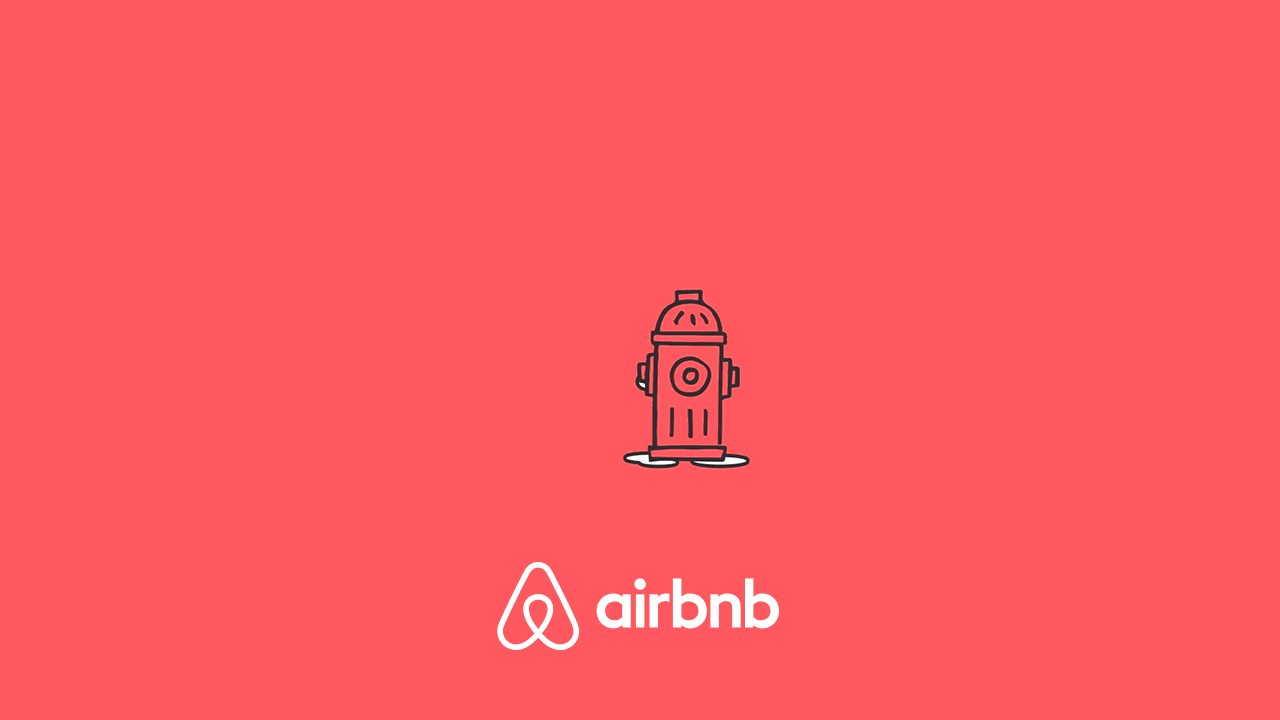

Let's start :D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Okay, before going to start. Let's understand what is Airbnb?

Looks Airbnb has interesting breakdown with names likely: Air, Bed and Breakfast to become Airbnb. Wow! This San-Francisco based startup offers you someone’s home as a place to stay instead of a hotel. Looks, somewhat on a same business as OYO but the former doesn't owns any property instead acts as an intermediary between those who want to rent out space and those who are looking for space to rent. 

Well, enough of it we understood what is the data all about and where it came from. 

Excited much? Lets deep dive!

Let me include all the soldiers in the battle!

In [ ]:
import pandas as pd
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from skimage.io import imread

In [ ]:
df_air=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dat/Airbnb NYC 2019.csv')
df_air

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# Data Exploration and variable Identification:

In [ ]:
#checking what are the variables here:
df_air.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
#basic information about the dataset
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#just a sanity check:
#looks all the property ids are different and each listings are different here!

df_air['id'].nunique()

48895

**So what are the numerical and categorical variables?**

By basic inspection I figured out that a particular property name will have one particular host_name hosted by that same individual but a particular host_name can have multiple properties in a area.

So, host_name is a categorical variable here. Also neighbourhood_group,neighbourhood and room_type fall into this category. <br>

While id, latitude, longitude,price,minimum_nights,number_of_reviews,last_review,	reviews_per_month	calculated_host_listings_count,	availability_365 are numerical variables

In [ ]:
#looking out for categorical variables
df_air.loc[df_air['name']=='Clean & quiet apt home by the park']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


In [ ]:
df_air[df_air['host_name']=='John'] #experimenting 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
429,148201,NYC - Sunny Greenwich Village 1br,715807,John,Manhattan,Greenwich Village,40.72831,-74.00177,Entire home/apt,175,3,18,2013-05-31,0.19,1,0
620,234870,Private Room With GREAT Location,1229984,John,Queens,Long Island City,40.74581,-73.95295,Private room,75,30,65,2017-07-31,0.74,3,219
991,400039,Big Beautiful Railroad in Brooklyn,1488809,John,Brooklyn,Bushwick,40.70339,-73.92945,Entire home/apt,130,30,53,2017-06-30,0.68,1,0
1141,484297,Large home in most desirable Brooklyn hood!,2397411,John,Brooklyn,Clinton Hill,40.68545,-73.96534,Entire home/apt,350,4,10,2018-09-12,0.12,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47624,35836317,Gorgeous Duplex 2BED/1.5BA Modern,269242923,John,Manhattan,Kips Bay,40.74490,-73.97888,Entire home/apt,288,5,2,2019-06-30,2.00,1,74
47689,35871036,Huge 1 bedroom w/ a backyard near the heart of...,226414996,John,Queens,Ditmars Steinway,40.77170,-73.90799,Entire home/apt,90,3,0,NaN,NaN,2,21
47915,35984474,Perfect Weekend Stay,229739739,John,Brooklyn,Flatbush,40.64726,-73.95455,Private room,85,14,0,NaN,NaN,2,176
48212,36140542,Wonderful Summer Vacation Getaways For Weeken...,229739739,John,Brooklyn,Flatbush,40.64600,-73.95455,Private room,85,7,0,NaN,NaN,2,176


In [ ]:
df_air[df_air['host_name']=='John']['name'].nunique()

293

In [ ]:
df_air['neighbourhood'].nunique() #looks this can be a categorical var too. lets check as well

221

In [ ]:
df_air['host_name'].nunique() #unique hosts

11452

In [ ]:
df_air['name'].nunique() #unique listings

47905

In [ ]:
df_air['name'].value_counts() 
#an interesting observation, looks like few listings have no particular host name as below observation!
#also few listings/property with same names has different hosts in different areas/neighbourhoods of a neighbourhood_group

Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Columbia campus 2 bedrooms apartment                   1
☀ Beautiful & Quiet ☀TIMES SQUARE ☀ 2 BDR Apt ☀        1
Trendy duplex in the very heart of Hell's Kitchen      1
Convenient, Renovated 2 Bedroom                        1
Times Square Suite with amazing views, high floor!     1
Name: name, Length: 47905, dtype: int64

In [ ]:
df_air[df_air['name']==df_air['host_name']] #looks there are few listings where the property name and the host have same names!
#we can remove duplicates later in our analysis!

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9473,7264659,Olivier,6994503,Olivier,Manhattan,Upper West Side,40.78931,-73.97520,Entire home/apt,200,5,12,2018-01-30,0.25,1,25
10682,8212051,Monty,43302952,Monty,Brooklyn,East Flatbush,40.66383,-73.92706,Shared room,95,2,7,2015-10-30,0.15,1,238
16422,13186374,Sean,35143476,Sean,Brooklyn,Windsor Terrace,40.65182,-73.98043,Entire home/apt,400,7,0,NaN,NaN,1,0
23996,19348168,Cyn,74033595,Cyn,Brooklyn,Bedford-Stuyvesant,40.67850,-73.91478,Private room,75,2,1,2018-09-10,0.10,1,0
24152,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,2017-07-23,0.08,18,90
24607,19785737,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70445,-73.81399,Private room,135,1,1,2017-10-08,0.05,18,180
26734,21231543,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70428,-73.81353,Private room,135,1,0,NaN,NaN,18,365
26752,21243952,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70288,-73.81531,Private room,135,1,1,2018-01-02,0.05,18,365
26753,21244035,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70319,-73.81410,Private room,135,1,2,2018-06-10,0.09,18,365
26889,21311903,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70258,-73.81510,Private room,135,1,0,NaN,NaN,18,365


In [ ]:
df_air[df_air['name']=='New york Multi-unit building'].head(4) #so on this viewpoint name also comes under categorical var!
#same property but hosted by different Airbnb hosts with different room_types & varied price ranges

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2751,1489426,New york Multi-unit building,7964729,Justin,Manhattan,Financial District,40.70582,-74.00888,Entire home/apt,390,3,1,2018-09-13,0.1,1,0
19016,15100883,New york Multi-unit building,95623284,Pablo,Bronx,Fordham,40.86533,-73.89713,Private room,40,3,1,2018-09-24,0.1,1,179
33473,26463879,New york Multi-unit building,21682640,Clarise,Brooklyn,Flatbush,40.64258,-73.95952,Private room,65,30,0,NaN,NaN,2,365
34613,27457026,New york Multi-unit building,125320407,Sata,Queens,Jamaica,40.70653,-73.80561,Entire home/apt,1000,2,0,NaN,NaN,5,365


In [ ]:
df_air.loc[(df_air['neighbourhood_group']=='Manhattan') & (df_air['host_name']=='Natasha')] #experiment
#Same hosts have hosted for different properties in same neighbourhood groups!

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4702,3304307,Lovely Shiny Private Room in NYC,12465884,Natasha,Manhattan,East Harlem,40.79269,-73.94218,Private room,100,3,64,2019-06-01,1.05,1,219
4853,3458525,Modern & Cozy 1BD Garden Apt,17430718,Natasha,Manhattan,Harlem,40.81511,-73.94315,Entire home/apt,115,3,64,2019-06-19,1.05,2,211
8686,6673630,Stylish L.E.S Studio,6591262,Natasha,Manhattan,Lower East Side,40.71661,-73.98916,Entire home/apt,150,3,1,2015-08-01,0.02,1,0
9376,7193201,Private RM in Heart of East Village,33739627,Natasha,Manhattan,East Village,40.72896,-73.98430,Private room,99,1,4,2015-10-24,0.08,1,0
10310,7894907,Cosy studio in East Village,1830864,Natasha,Manhattan,East Village,40.72395,-73.98001,Entire home/apt,150,2,25,2016-07-22,0.55,1,0
11344,8813547,For Christmas-Large New 1 BR Near Central Park,30350590,Natasha,Manhattan,Theater District,40.76268,-73.98407,Private room,230,5,10,2016-09-10,0.23,1,0
20061,16066223,"Spacious, quiet 1 br apt in beautiful Inwood!",1713011,Natasha,Manhattan,Inwood,40.86757,-73.92699,Entire home/apt,89,14,14,2019-05-13,0.57,1,4
21145,16779705,Cozy West Village Studio,11699846,Natasha,Manhattan,Greenwich Village,40.73239,-73.99960,Entire home/apt,103,2,15,2018-10-28,0.57,1,0
22125,17808917,Gorgeous & Spacious UES apartment,85218001,Natasha,Manhattan,Upper East Side,40.77666,-73.95618,Private room,105,2,8,2018-06-16,0.30,1,0
24200,19499668,Cozy Sofa Bed in Upper Manhattan,3372118,Natasha,Manhattan,Washington Heights,40.84133,-73.93739,Shared room,50,1,21,2019-06-15,0.86,1,188


In [ ]:
df_air['host_id'].value_counts()[:4] #host ids with most listings counts

219517861    327
107434423    232
30283594     121
137358866    103
Name: host_id, dtype: int64

So, far I was trying to understand the two variables: name and host_name & its relationship with neighbourhood_group and neighbourhood.(only from the values present inside) <br>

Found out that: A host can have multiple properties in a neighbourhood group with different host-ids but a host with a particular property/listing in a particular neighbourhood of a neighbourhood group have a same host-id(not mandatory as there are exceptions where few hosts have diferrent id's for each listing/property in a neighbourhood)

Also the data so far tells, there might be cases where a particular host has co-hosted someone else's property/listing in a neighbourhood on Airbnb. 

We'll not bother much as these are not that important in our analysis and proceed further!

In [ ]:
df_air.describe() #getting the overall summary statistics for all numerical columns

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Looks there are some property listed with 0 listed price!

In [ ]:
len(df_air[df_air['price']==0]) #so 11 property/listings have 0 price listed.

11

In [ ]:
#if a person trying to book a listing for stay/rent he/she will look into these following factors while booking:
#name,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews
#these are the important ones in our analysis. We'll crosscheck though at last!

In [ ]:
df_air['host_name'].value_counts()[:5] #5 hosts with most listings counts in entire NYC

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Name: host_name, dtype: int64

# Let's do the analysis step by step!

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


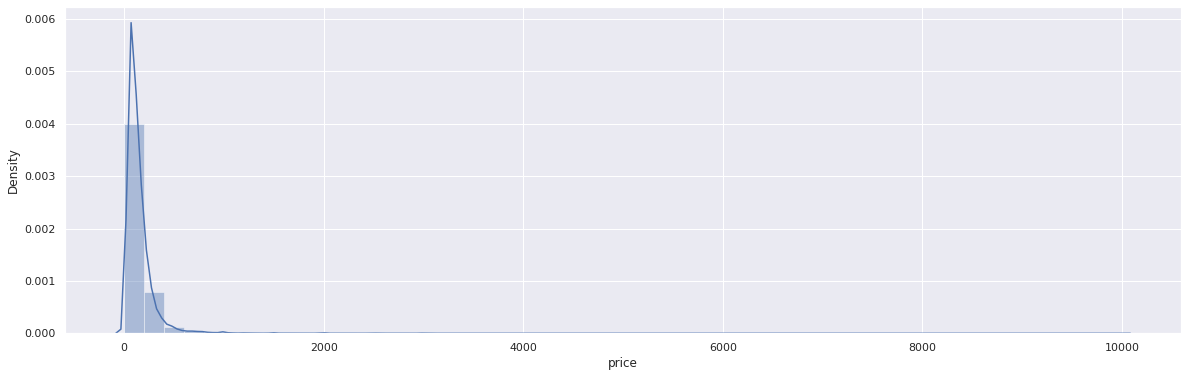

In [ ]:
#distplot
# f,ax=plt.subplots(figsize=(8,6))
sns.set(rc={"figure.figsize": (20, 6)})
sns.distplot(df_air['price'],hist=True)

In [ ]:
#The distribution tells it has positive skew
#also the distribution doesn't deviate much from normal distribution.

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df_air['price'].skew())
print("Kurtosis: %f" % df_air['price'].kurt())

Skewness: 19.118939
Kurtosis: 585.672879


In [ ]:
#looks the skew and kurtosis came out very large. Since the skewness has value>1 it is highly skewed.
#Also kurtosis looks high as well which indicates presence of good amount of outliers,we will look later into that when we handle outliers!!

**checking the relationship between numerical variables!**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


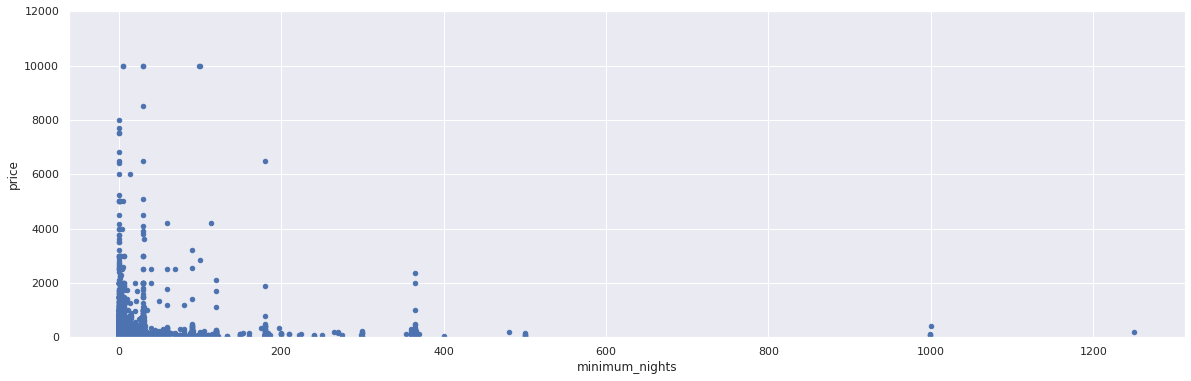

In [ ]:
# price vs minimum_nights

var='minimum_nights'

data=pd.concat([df_air['price'],df_air[var]],axis=1)
data.plot.scatter(x=var,y='price',ylim=(0,12000))

In [ ]:
#looks many data points are clustured on 0 price range, few have min nights for stay but price is 0. looks like anomaly in price.
#there are many outliers as well.

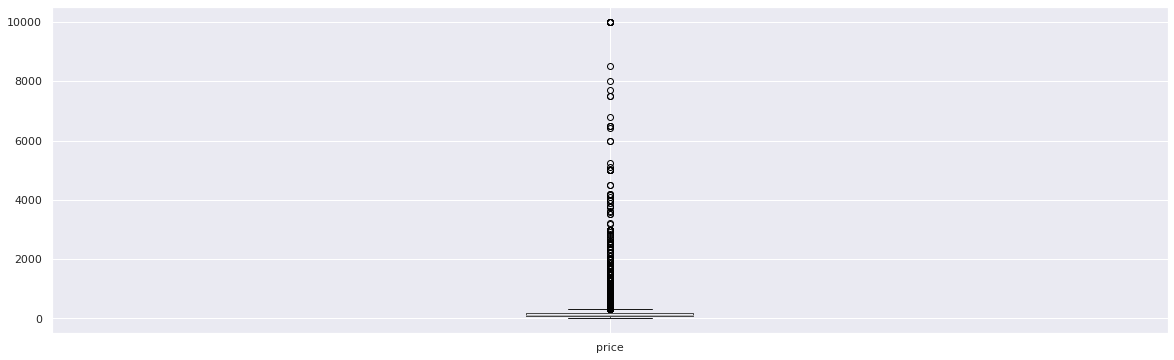

In [ ]:
df_air.boxplot(column=['price'])
plt.show()
#we can see the presence of many outliers in price. Definitely we'll remove those, Patience!

In [ ]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Let's check the **correlation** matrix to understand how are the features interrelated with each other.<br> 

Also to get an idea which are the most important features in this data.




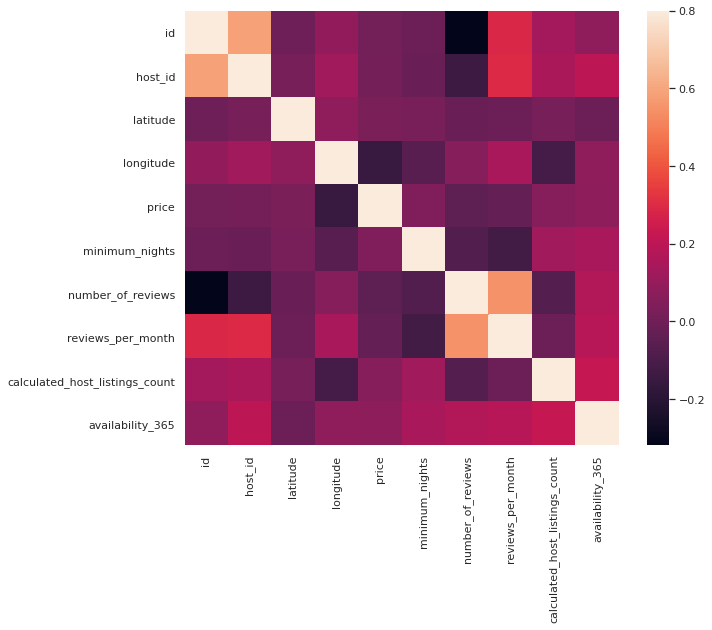

In [ ]:
#correlation matrix
corrmat = df_air.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

Clearly from the heatmap we can see the correlation between different features that can affect a airbnb listing. <br>

Guess what? There's correlation among host_id to reveiws_per_month & availability_365. Also there's noticiable correlation between min_nights to no_of_listings_count & availability_365. Price also shows some correlation with availability_365 & host_listings_count. <br>

no_of_reviews and reviews_per_month gives almost the same information. so we can carry out analysis with any of the two variable. Also, no_of_reviews is correlated to availability_365!

**Data Pre-processing:**

In [ ]:
#checking null values!
df_air.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Missing values**

As, host_names and names are not that important in our analysis, so atleast we are good to fill those with some substitutes in both the columns!

In [ ]:
#since both 'name' and 'host_name' has very less missing values as compared to 47,905 listings and 11452 unique hosts!
#we can fill these missing values in both with unknown & no_name respectively!

df_air['name'].fillna('unknown',inplace=True)
df_air['host_name'].fillna('no_name',inplace=True)

In [ ]:
df_air[['host_name','name']].isnull().values.any() #looks the null values are removed!

False

In [ ]:
no_of_hosts= df_air['host_name'].nunique()
print(f'The no of hosts in NYC: {no_of_hosts}')
no_of_listings= df_air['name'].nunique()
print(f'The total no of listings in NYC: {no_of_listings}')

The no of hosts in NYC: 11453
The total no of listings in NYC: 47906


Also the column: 'last_review' has many null values. And since it's not much required for our analysis as compared to number_of_reviews & reviews_per_month. We're good to drop this column.

In [ ]:
df_air= df_air.drop(['last_review'],axis=1)

In [ ]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

**Checking for duplicate data**

In [ ]:
duplicate_data = df_air.duplicated()
print(duplicate_data.sum())
df_air[duplicate_data]
#looks like there's no duplicate data present!

0


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


The reviews_per_month column containing null values and we can simple put 0 reviews by replacing NAN's<br>
makes sense right? 

In [ ]:
df_air['reviews_per_month']=df_air['reviews_per_month'].replace(to_replace=np.nan,value=0).astype('int64')

In [ ]:
df_air['reviews_per_month'].isnull().values.any()

False

**Let's check the most no of listings in NYC first!**

In [ ]:
#top 5 listings on Airbnb in entire NYC:

listings_count_df=df_air['name'].value_counts()[:5].reset_index()
listings_count_df.rename(columns={'index':'Listings on Airbnb','name':'Total_listings'},inplace=True)
listings_count_df

,Listings on Airbnb,Total_listings
0,Hillside Hotel,18
1,Home away from home,17
2,New york Multi-unit building,16
3,unknown,16
4,Brooklyn Apartment,12


Hillside Hotel is found to have listed more listings in entire NYC, followed by Home away from Home.

In [ ]:
top_10_hosts=df_air['host_name'].value_counts()[:10] #top 10 hosts on the basis of no of listings in entire NYC!

In [ ]:
top_10_hosts

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

Text(0.5, 1.0, 'top 10 hosts on the basis of no of listings in entire NYC!')

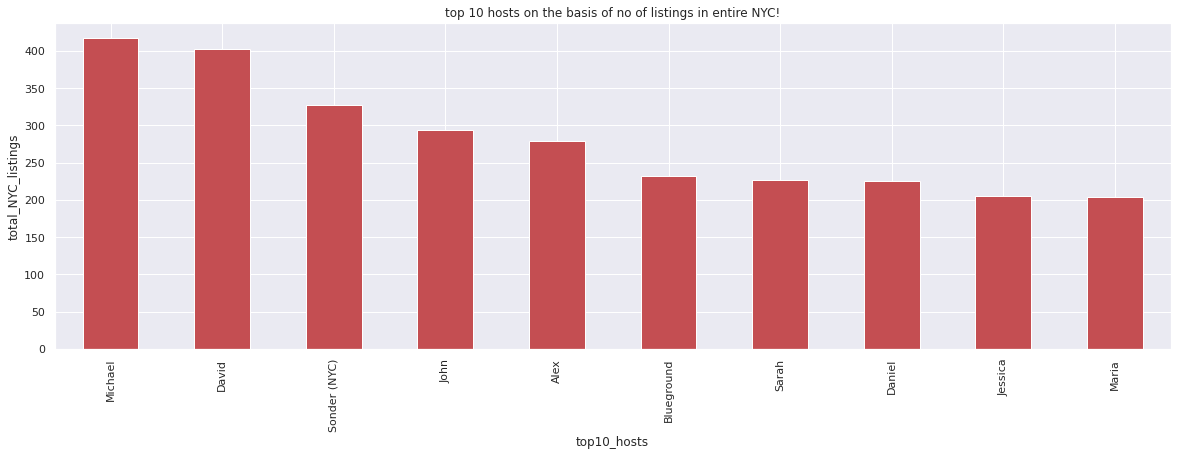

In [ ]:
top_10_hosts.plot(kind='bar',color='r')
plt.xlabel('top10_hosts')
plt.ylabel('total_NYC_listings')
plt.title('top 10 hosts on the basis of no of listings in entire NYC!')

Text(0.5, 1.0, 'Count of no of listings in entire NYC of each neighbourhood group!')

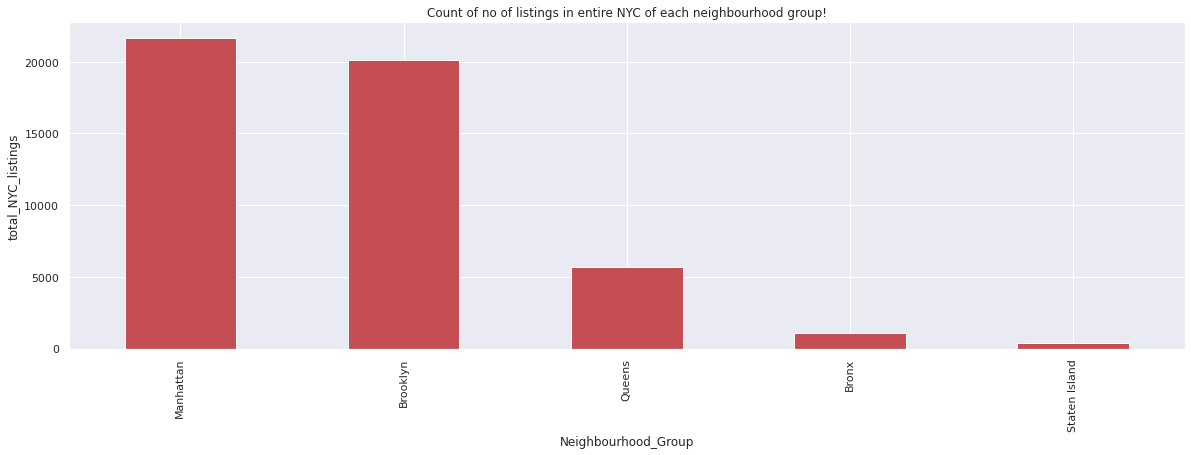

In [ ]:
#the neighbourhood group 'Manhattan' has the highest no of listings in entire NYC! 
df_air['neighbourhood_group'].value_counts().plot(kind='bar',color='r')
plt.xlabel('Neighbourhood_Group')
plt.ylabel('total_NYC_listings')
plt.title('Count of no of listings in entire NYC of each neighbourhood group!')

In [ ]:
df_air['neighbourhood'].unique() #looking at the unique neighbourhoods 

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

Text(0.5, 1.0, 'Top neighbourhoods in entire NYC on the basis of count of listings')

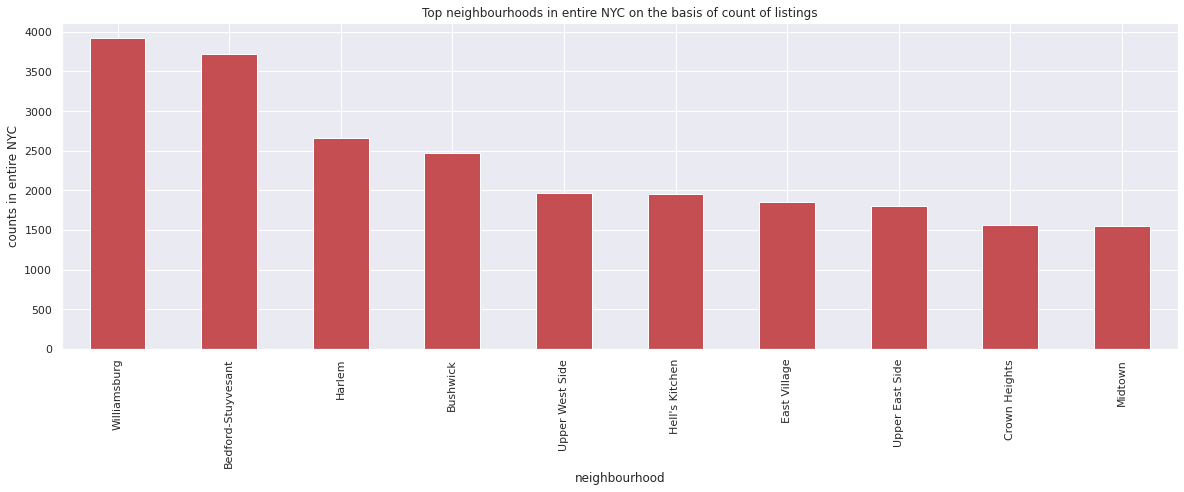

In [ ]:
top_10_neigbours= df_air['neighbourhood'].value_counts()[:10] #checking top 10 neighbourhoods on the basis of no of listings in entire NYC!
top_10_neigbours.plot(kind='bar',color='r')
plt.xlabel('neighbourhood')
plt.ylabel('counts in entire NYC')
plt.title('Top neighbourhoods in entire NYC on the basis of count of listings')

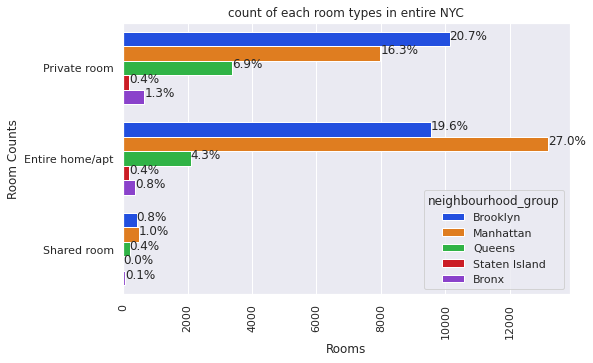

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)
ax= sns.countplot(y='room_type',hue='neighbourhood_group',data=df_air,palette='bright')

total = len(df_air['room_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('count of each room types in entire NYC')
plt.xlabel('Rooms')
plt.xticks(rotation=90)
plt.ylabel('Room Counts')

plt.show()

Manhattan has more listed properties with Entire home/apt around 27% of total listed properties followed by Brooklyn with around 19.6%. <br>

Private rooms are more in Brooklyn as in 20.7% of the total listed properties followed by Manhattan with 16.3% of them. While 6.9% of private rooms are from Queens.<br>

Very few of the total listed have shared rooms listed on Airbnb where there's negligible or almost very rare shared rooms in Staten Island and Bronx. 

We can infer that Brooklyn,Queens,Bronx has more private room types while Manhattan which has the highest no of listings in entire NYC has more Entire home/apt room types.

# Let's look at the distribution of the listings with availability!

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


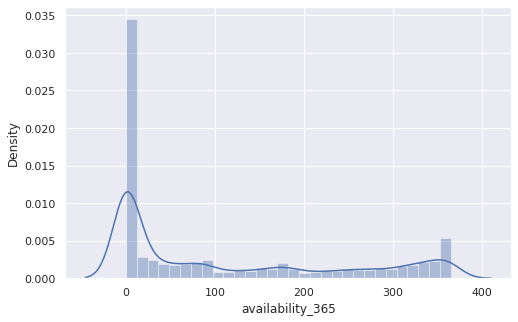

In [ ]:
#distribution of listings availability at NYC!
sns.distplot(df_air['availability_365'])

availability_365 have uniform distribution with availability ranging from 0 to 370<br>

The distribution looks slighly skewed towards right or moderately skewed as per the skewness value ranging between: (0.5-0.1)<br>

Also the distribution looks flatter as compared to a normal distribution, known to be platykurtosis with a negative kurtosis(lack of outliers) as below:

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df_air['availability_365'].skew())
print("Kurtosis: %f" % df_air['availability_365'].kurt())

Skewness: 0.763408
Kurtosis: -0.997534


Reviews/month distribution as per listings in NYC

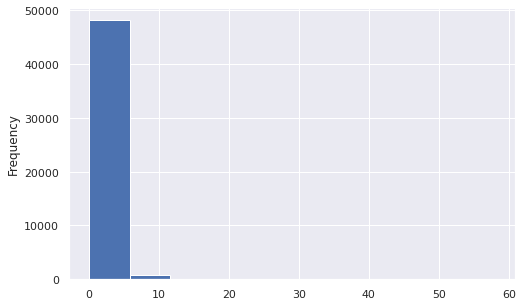

In [ ]:
df_air['reviews_per_month'].plot.hist()


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


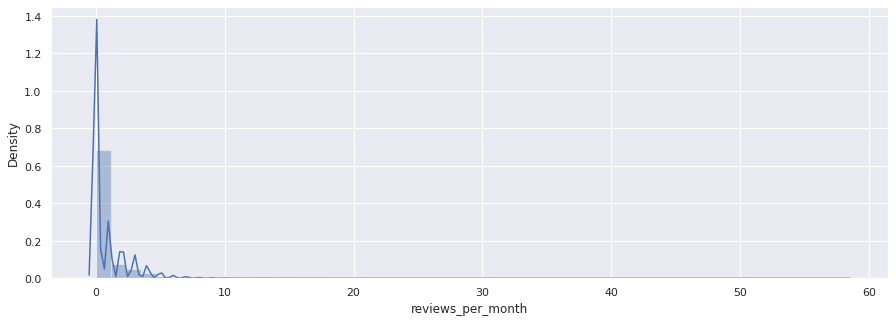

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
sns.distplot(df_air['reviews_per_month'])


Looks the reviews_per_month is positively skewed(high) towards right with longer tails indicating the presence of outliers.<br>

Moreover, from the two distribution we can infer that monthly reviews goes from 0-10 and it ranges till 60 at highest.

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df_air['reviews_per_month'].skew())
print("Kurtosis: %f" % df_air['reviews_per_month'].kurt())
#both skewness and kurtosis are much high, indicates presence of large amount of outliers.

Skewness: 3.751642
Kurtosis: 54.337612


**Handling the outliers**

The famous price column?!

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


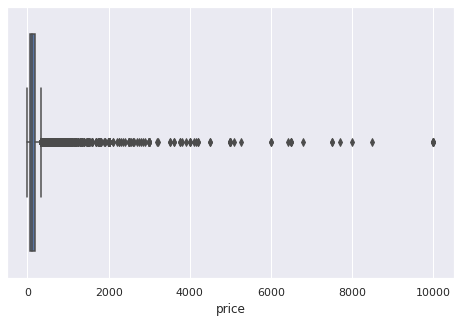

In [ ]:
sns.boxplot(df_air['price'])

In [ ]:
df_air.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,0.806258,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.502767,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.000000,327.000000,365.000000


In [ ]:
#using quantile approach to remove outliers.

In [ ]:
min_threshold,max_threshold= df_air.price.quantile([0.01,0.999])
min_threshold,max_threshold

(30.0, 3000.0)

In [ ]:
df_air[df_air.price<min_threshold] #prices less than min threshold!

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
957,375249,Enjoy Staten Island Hospitality,1887999,Rimma & Jim,Staten Island,Graniteville,40.62109,-74.16534,Private room,20,3,80,0,1,226
2675,1428154,"Central, Peaceful Semi-Private Room",5912572,Tangier,Brooklyn,Flatbush,40.63899,-73.95177,Shared room,29,2,5,0,1,321
2860,1620248,Large furnished 2 bedrooms- - 30 days Minimum,2196224,Sally,Manhattan,East Village,40.73051,-73.98140,Entire home/apt,10,30,0,0,4,137
3020,1767037,Small Cozy Room Wifi & AC near JFK,9284163,Antonio,Queens,Woodhaven,40.68968,-73.85219,Private room,29,2,386,5,3,50
3918,2431607,"Bright, Airy Room Share for 2",4973668,Gloria,Brooklyn,Bedford-Stuyvesant,40.68642,-73.93440,Shared room,25,5,76,1,3,258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48486,36280646,"Cable and wfi, L/G included.",272872092,Chris,Queens,Forest Hills,40.73657,-73.85088,Entire home/apt,16,9,1,1,1,322
48647,36354776,Cozy bedroom in diverse neighborhood near JFK,273393150,Liza,Queens,Richmond Hill,40.68639,-73.81847,Private room,28,2,0,0,1,24
48832,36450814,FLATBUSH HANG OUT AND GO,267223765,Jarmel,Brooklyn,Flatbush,40.64922,-73.96078,Shared room,20,1,0,0,3,363
48867,36473044,The place you were dreaming for.(only for guys),261338177,Diana,Brooklyn,Gravesend,40.59080,-73.97116,Shared room,25,1,0,0,6,338


In [ ]:
df_air[df_air.price>max_threshold] #similary for getting extreme price value above max_threshold

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1862,826690,"Sunny, Family-Friendly 2 Bedroom",4289240,Lucy,Brooklyn,Prospect Heights,40.67919,-73.97191,Entire home/apt,4000,4,0,0,1,83
2698,1448703,Beautiful 1 Bedroom in Nolita/Soho,213266,Jessica,Manhattan,Nolita,40.72193,-73.99379,Entire home/apt,5000,1,2,0,1,365
3537,2110145,UWS 1BR w/backyard + block from CP,2151325,Jay And Liz,Manhattan,Upper West Side,40.77782,-73.97848,Entire home/apt,6000,14,17,0,1,359
3695,2224896,NYC SuperBowl Wk 5 Bdrs River View,11353904,Todd,Manhattan,Upper West Side,40.79476,-73.97299,Entire home/apt,4000,1,0,0,1,0
3720,2243699,"SuperBowl Penthouse Loft 3,000 sqft",1483320,Omri,Manhattan,Little Italy,40.71895,-73.99793,Entire home/apt,5250,1,0,0,1,0
3774,2271504,SUPER BOWL Brooklyn Duplex Apt!!,11598359,Jonathan,Brooklyn,Clinton Hill,40.68766,-73.96439,Entire home/apt,6500,1,0,0,1,0
3788,2281142,Prime NYC Location for Super Bowl,1427243,Jordana,Manhattan,East Village,40.73323,-73.98859,Entire home/apt,3750,1,0,0,1,0
4345,2919330,NearWilliamsburg bridge 11211 BK,14908606,Bianca,Brooklyn,Bedford-Stuyvesant,40.69572,-73.95731,Private room,5000,6,10,0,1,363
4376,2952861,Photography Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69127,-73.96563,Entire home/apt,4500,1,5,0,11,365
4377,2953058,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,0,11,365


In [ ]:
df_air_pnw= df_air[(df_air.price>min_threshold)&(df_air.price<max_threshold)]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


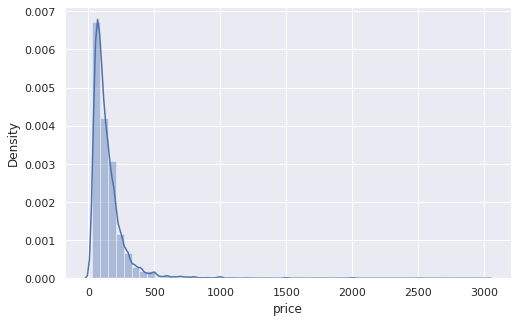

In [ ]:
sns.distplot(df_air_pnw['price'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


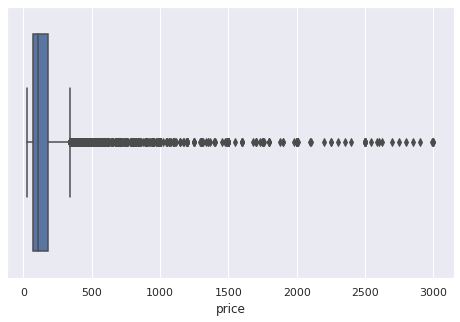

In [ ]:
sns.boxplot(df_air_pnw['price']) #looks there are still many outliers!

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df_air_pnw['price'].skew())
print("Kurtosis: %f" % df_air_pnw['price'].kurt())

Skewness: 6.378314
Kurtosis: 70.394436


**Removing Outliers using IQR approach!**
(has performed best in removing outliers)



In [ ]:
#trying removing outliers using IQR!

In [ ]:
Q1 = df_air.quantile(0.25)
Q3 = df_air.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                                1.968023e+07
host_id                           9.961239e+07
latitude                          7.301500e-02
longitude                         4.679500e-02
price                             1.060000e+02
minimum_nights                    4.000000e+00
number_of_reviews                 2.300000e+01
reviews_per_month                 1.000000e+00
calculated_host_listings_count    1.000000e+00
availability_365                  2.270000e+02
dtype: float64


In [ ]:
#writing a outlier function for removing outliers!
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 
 return lower_range,upper_range

In [ ]:
lower_bound,upper_bound = outlier_treatment(df_air['price'])

In [ ]:
df_air[(df_air.price < lower_bound) | (df_air.price > upper_bound)] #looking at the low and upper range outliers

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,0,1,180
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,0,1,7
103,23686,2000 SF 3br 2bath West Village private townhouse,93790,Ann,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,0,2,243
114,26933,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,0,4,298
121,27659,3 Story Town House in Park Slope,119588,Vero,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,0,2,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48758,36420289,"Rustic Garden House Apt, 2 stops from Manhattan",73211393,LaGabrell,Queens,Long Island City,40.75508,-73.93258,Entire home/apt,350,2,0,0,1,364
48833,36450896,Brand New 3-Bed Apt in the Best Location of FiDi,29741813,Yue,Manhattan,Financial District,40.70605,-74.01042,Entire home/apt,475,2,0,0,1,64
48839,36452721,Massage Spa. Stay overnight. Authors Artist dr...,274079964,Richard,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800,1,0,0,1,23
48842,36453160,LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...,224171371,LuxuryApartmentsByAmber,Manhattan,Chelsea,40.75204,-74.00292,Entire home/apt,350,1,0,0,1,9


In [ ]:
#subsetting only those rows having datapoints greater than lower range and lesser than upper range respectively
df_air_pnw1 = df_air[(df_air.price>lower_bound) & (df_air.price<upper_bound)]

In [ ]:
df_air_pnw1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,6,2


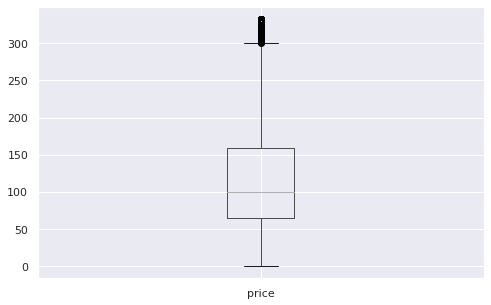

In [ ]:
df_air_pnw1.boxplot(column='price') #the boxplot for price now looks good without outliers!

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df_air_pnw1['price'].skew())
print("Kurtosis: %f" % df_air_pnw1['price'].kurt())

Skewness: 0.922925
Kurtosis: 0.169543


Let's check for the distribution of this new price as well.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


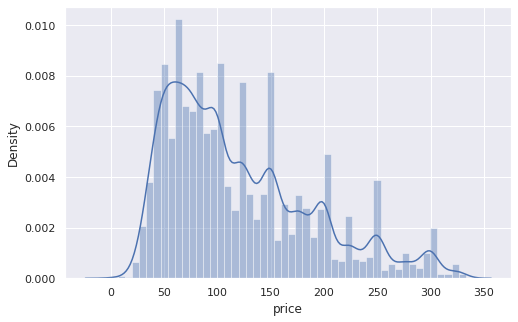

In [ ]:
sns.distplot(df_air_pnw1['price'])

**Bi-variate Analysis!**

Now let's understand the distribution of price(without extreme values) along neighbourhood groups

In [ ]:
df_air_pnw1['neighbourhood_group'].value_counts()

Manhattan        19501
Brooklyn         19415
Queens            5567
Bronx             1070
Staten Island      365
Name: neighbourhood_group, dtype: int64

**Distribution of price across Manhattan,Brooklyn,Queens,Bronx & Staten Island :-**

Instead of checking distributions for each categories one by one we can simply do a violin plot for getting the overall statistics for each groups. But we'll get to know the median of price/neighbourhood group. <br>

We can do a seaborn point plot to get the average prices/neighbourhood in NYC! 

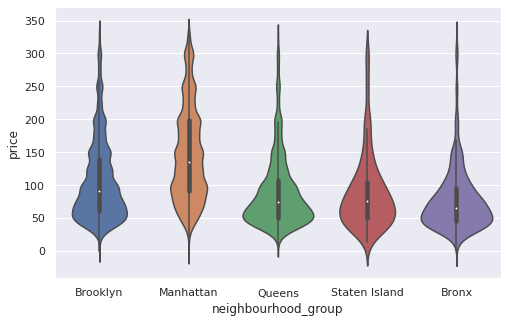

In [ ]:
ax= sns.violinplot(x='neighbourhood_group',y='price',data=df_air_pnw1)


As usual Manhattan being the most costliest place to live in, have price more than 140 USD followed by Brooklyn with around 80 USD on an average for the listings. <br>

Queens, Staten Island are on the same page with price on listings.

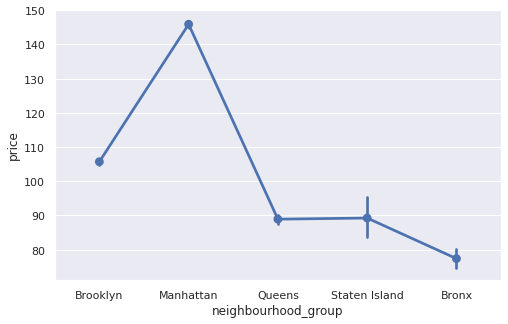

In [ ]:
#looking for the average price each neighbourhood groups holds in a seaborn pointplot
sns.pointplot(x = 'neighbourhood_group', y='price', data=df_air_pnw1, estimator=mean)

We can see that **Manhattan** has the highest(the costliest) average of price ranging to ~150dollars/day followed by **Brooklyn** <br> 

**Queens** and **Staten Island** have same average price/day, while **Bronx** comes out to be the cheapest neighbourhood group in NYC. 

Well, let's deep dive into cost of living as it is the most important factor for someone willing to rent/stay using Airbnb.

# **Now, Let's check the expensive & cheapest listings with respect to prices leading in entire NYC!**

**The costliest?**

In [ ]:
df_air_pnw.nlargest(5,'price')[['name','neighbourhood_group','neighbourhood','host_name','room_type']]

,name,neighbourhood_group,neighbourhood,host_name,room_type
38498,"LUXURIOUS 5 bedroom, 4.5 bath home",Manhattan,Upper West Side,Lisa,Entire home/apt
48304,Next to Times Square/Javits/MSG! Amazing 1BR!,Manhattan,Hell's Kitchen,Rogelio,Entire home/apt
46533,Amazing Chelsea 4BR Loft!,Manhattan,Chelsea,Viberlyn,Entire home/apt
30824,Designer's Beautiful 2BR Apartment in NOLITA/SOHO,Manhattan,Nolita,Ilo And Richard,Entire home/apt
22992,"Modern Townhouse for Photo, Film & Daytime Ev...",Manhattan,Upper West Side,Lanie,Entire home/apt


Looks like the all the top 5 costliest listings belongs to **Manhattan** itself(being the most costliest place of living in NYC)

**The cheapest?**

In [ ]:
df_air_pnw.sort_values(by='price',ascending=True)[['name','neighbourhood_group','neighbourhood','host_name','room_type']][:5]

,name,neighbourhood_group,neighbourhood,host_name,room_type
12516,cute and cozy room in brooklyn,Brooklyn,Bedford-Stuyvesant,Ornella,Private room
7864,Comfortable and Large Room,Brooklyn,Flatbush,Kay,Private room
29967,Large bed room share bathroom,Queens,Elmhurst,Cha,Private room
39100,15 minutes From Times Square!!,Manhattan,Washington Heights,Ari,Private room
28700,Cozy room in Loft Apartment - Brooklyn,Queens,Ridgewood,Estefani,Private room


Also, the cheapest listings mostly comes from **Brooklyn**, **Queens** and all are private rooms which makes sense. 

# Top neighbourhoods in NYC with respect to average price/day of Airbnb listings:

let's check for the neighbourhoods with listings having highest average price/day in each neighbourhood groups of NYC!

In [ ]:
df_ngrp= df_air_pnw.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index()

In [ ]:
top_neigh_each= df_ngrp.loc[df_ngrp.groupby('neighbourhood_group')['price'].idxmax()].sort_values(by='price',ascending=False)
top_neigh_each

,neighbourhood_group,neighbourhood,price
188,Staten Island,Fort Wadsworth,800.000000
88,Brooklyn,Sea Gate,487.857143
34,Bronx,Riverdale,442.090909
121,Manhattan,Tribeca,410.531429
163,Queens,Neponsit,274.666667


Among the top neighbourhoods in each neighbourhood groups, top 2 of them namely: **Fort Wadsworth** & **Sea Gate**, origins from **Staten Island** & **Brooklyn**. <br>

**Riverdale** from **Bronx** and **Tribeca** from **Manhattan**. **Neponsit** from **Queens**. 

Text(0, 0.5, 'price')

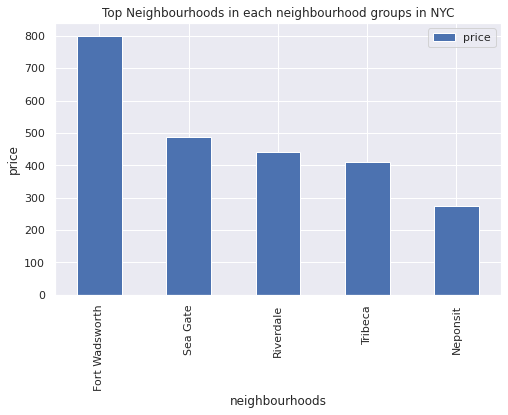

In [ ]:
top_neigh_each.plot.bar(x='neighbourhood', rot=90, title='Top Neighbourhoods in each neighbourhood groups in NYC')
plt.xlabel('neighbourhoods')
plt.ylabel('price')

# Let's checkout the costliest listings in each neighbourhood groups & their respective hosts:

In [ ]:
#costliest listings in each neighbourhood groups
costliest_df= df_air_pnw.loc[df_air_pnw.groupby(['neighbourhood_group'])['price'].idxmax()][['name','neighbourhood_group','host_name','price']]

In [ ]:
costliest_df.sort_values(by='price',ascending=False)

,name,neighbourhood_group,host_name,price
38498,"LUXURIOUS 5 bedroom, 4.5 bath home",Manhattan,Lisa,2999
29665,Park Place Townhouse by (Hidden by Airbnb),Brooklyn,Sally,2626
42680,Majestic Mansion LifeStyle :),Queens,Shah,2600
24477,"""The luxury of Comfort""",Bronx,Kathy,2500
45572,Central Hall Colonial with Free Parking Bus EX...,Staten Island,Anastasios,1250


Looks like the top 2 costliest listings: **LUXURIOUS 5 bedroom, 4.5 bath home** & **Park Place Townhouse** were from Manhattan and Brooklyn, hosted by Lisa and Sally respectively.

**Also, the cheapest listings in each neighbourhood groups & their respective hosts:**

In [ ]:
#cheapest listings in each neighbourhood groups
cheapest_df= df_air_pnw.loc[df_air_pnw.groupby('neighbourhood_group')['price'].idxmin()][['neighbourhood_group','name','host_name','price']]

In [ ]:
cheapest_df.sort_values(by='price',ascending=True)

,neighbourhood_group,name,host_name,price
2887,Brooklyn,Amazing Spacious Room,Lord Daniel,31
7431,Manhattan,Cozy room right on BROADWAY - Washington Heights,Nga,31
6615,Queens,"Super Clean, Quiet & Spacious Room",Troy,31
30312,Staten Island,Nice room near SI Ferry \n15 minutes by car.,Sara I,31
3889,Bronx,"A Simple, Calm Space",Août,32


Looks almost all the neighbourhood groups with the lowest price falls in the same price range for the cheapest listings.

# Room_types vs price on different neighbourhood groups!

In [ ]:
df_air_pnw['room_type'].unique() #unique rooms available throughout NYC

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

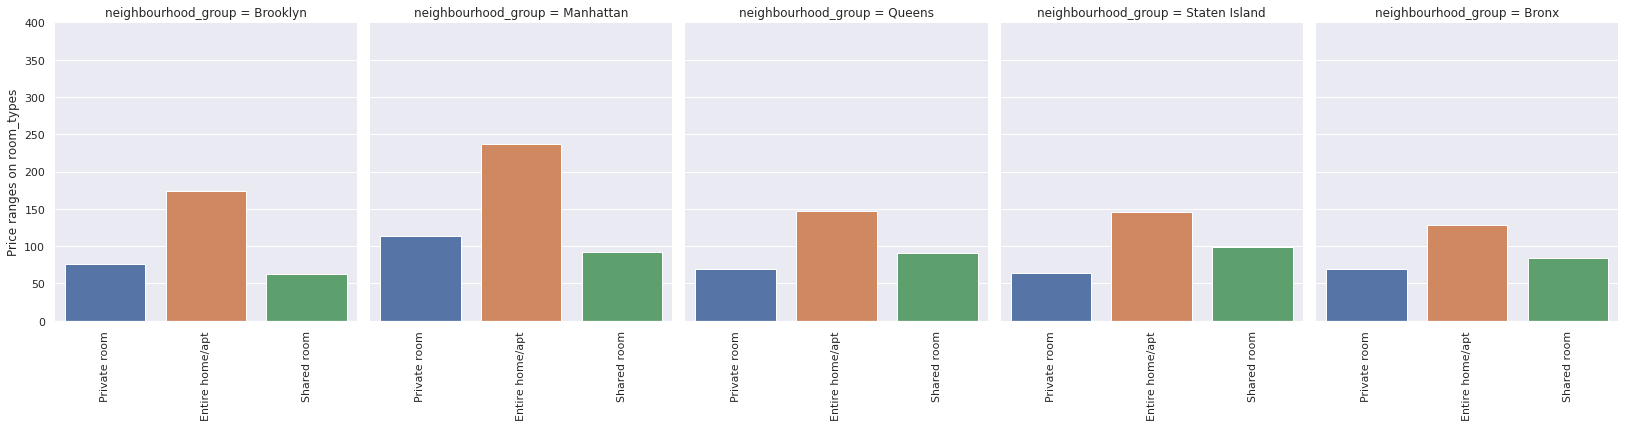

In [ ]:
#room_type vs price
g = sns.catplot(x="room_type", y="price", col="neighbourhood_group",
                data=df_air_pnw, saturation=.8,
                kind="bar",ci=None,  aspect=.9)
(g.set_axis_labels("", "Price ranges on room_types")
  .set_xticklabels(["Private room", "Entire home/apt", "Shared room"],rotation=90)
  .set(ylim=(0, 400))
  .despine(left=True)) 


Looks like a property/listing with **Entire home/apt** as room_type wins the show at NYC followed by private rooms. <br>

**Manhattan** has the highest price for room types with **Entire home/apt**  ranging to nearly 240 USD/night, followed by **Private room** with 110 USD/night. And it's obvious being the most expensive place to live in!

# On an average for how many nights people stayed in each room_types!

Text(0, 0.5, 'Min Stays')

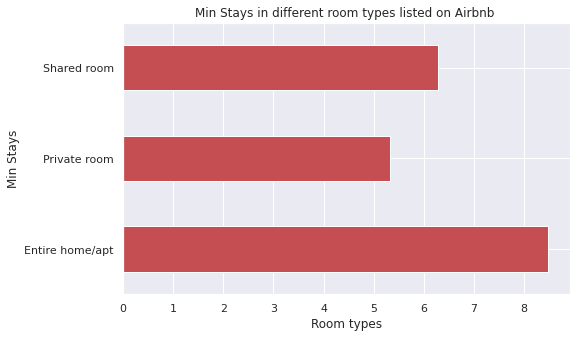

In [ ]:
# min_night= df_air_pnw['room_type']
df_air_pnw.groupby('room_type')['minimum_nights'].mean().plot(kind='barh',color='r')
plt.title('Min Stays in different room types listed on Airbnb ')
plt.xlabel('Room types')
plt.ylabel('Min Stays')
# ax = sns.swarmplot(x="room_type", y="minimum_nights", data=df_air)

Looking at these it clearly indicates that people mostly prefer living in an **entire home/apt** on an average of more than **8 nights** followed by guests who stayed in **shared room** where average stay is **6-7 nights**.

# Let's play around with the reviews on listings in NYC!

In [ ]:
#top 10 most reviewed listings in NYC!
top10_reviewed_listings= df_air.nlargest(10,'reviews_per_month')
top10_reviewed_listings[['name','reviews_per_month','neighbourhood_group']]

,name,reviews_per_month,neighbourhood_group
42075,Enjoy great views of the City in our Deluxe Room!,58,Manhattan
42076,Great Room in the heart of Times Square!,27,Manhattan
38870,Lou's Palace-So much for so little,20,Queens
27287,JFK Comfort.5 Mins from JFK Private Bedroom & ...,19,Queens
28651,JFK 2 Comfort 5 Mins from JFK Private Bedroom,17,Queens
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,16,Queens
22469,Cute Tiny Room Family Home by LGA NO CLEANING FEE,16,Queens
29628,JFK 3 Comfort 5 Mins from JFK Private Bedroom,16,Queens
36238,“For Heaven Cakes”,15,Queens
40036,6 Minutes From JFK Airport Cozy Bedroom,15,Queens


So, this are the listings with highest number of reviews, the highest being: **Enjoy great views of the City in our Deluxe Room!** with 58 reviews/month followed by **Great Room in the heart of Times Square!** with a total of 27 reviews/month. Top 2 are from Manhattan so we can decide the best suited place for a comfortable stay but the prices are high to afford.  

**Also, Lets look how monthly reviews varies with room types in each neighbourhood groups!**

Text(0.5, 1.0, 'Most Reviewed room_types in each Neighbourhood Groups')

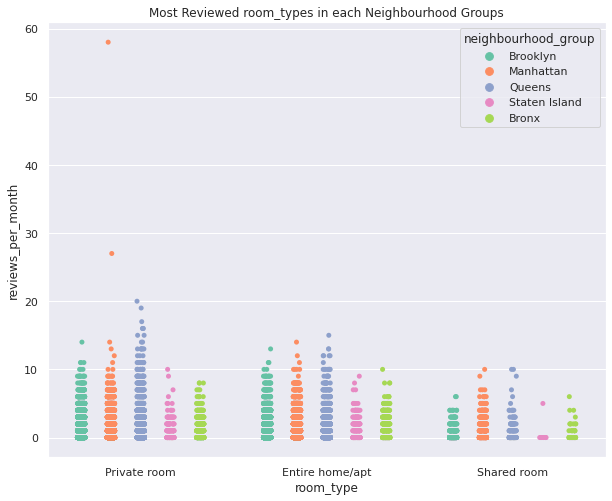

In [ ]:
f,ax = plt.subplots(figsize=(10,8))
ax= sns.stripplot(x='room_type',y='reviews_per_month',hue='neighbourhood_group',dodge=True,data=df_air,palette='Set2')
ax.set_title('Most Reviewed room_types in each Neighbourhood Groups')

We can see that **Private room** recieved the most no of reviews/month where **Manhattan** had the highest reviews received for Private rooms with more than 50 reviews/month, followed by **Manhattan** in the chase. <br>

Manhattan & Queens got the most no of reviews for Entire home/apt room type. <br>

There were less reviews recieved from **shared rooms** as compared to other room types and it was from **Staten Island** followed by **Bronx**.

**Let's find the top 10 reviewed hosts on the basis of reviews/month.**

Text(0.5, 1.0, 'Top 10 Reviews/month received by hosts')

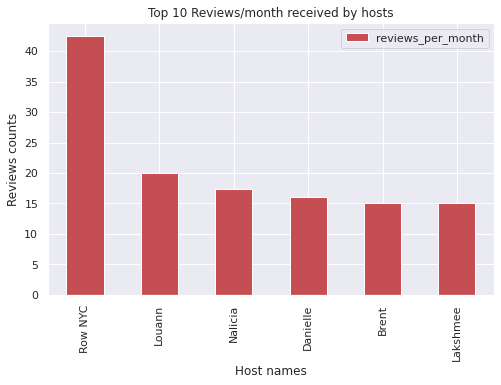

In [ ]:
#there are cases where same hosts are hosting multiple properties in same/different areas.
reviews_df=top10_reviewed_listings.groupby('host_name')['reviews_per_month'].mean() 
reviews_df=reviews_df.reset_index().sort_values(by='reviews_per_month',ascending=False)
reviews_df.plot(x='host_name',y='reviews_per_month',kind='bar',color='r')
plt.ylabel('Reviews counts')
plt.xlabel('Host names')
plt.title('Top 10 Reviews/month received by hosts')

Row NYC holds the title as the most reviewed host with more than 40 reviews/month on average.

# Hosts with most no of listings in NYC(on the basis of host listings count):

In [ ]:
host_with_most_listings= df_air.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].sum().reset_index()
largest_listings_df= host_with_most_listings.nlargest(10,'calculated_host_listings_count')
largest_listings_df

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,106929
1834,Blueground,Manhattan,53360
7275,Kara,Manhattan,14669
6540,Jeremy & Laura,Manhattan,9216
13216,Sonder,Manhattan,9216
2901,Corporate Housing,Manhattan,8281
7480,Kazuya,Queens,8137
7546,Ken,Manhattan,7500
11399,Pranjal,Manhattan,4225
9856,Mike,Manhattan,2824


So, **Sonder(NYC)** leads the most expensive neighbourhood group in NYC with around 106929 properties listed followed by Blueground and Kara. <br>

Also, all 3 of them has their listings on Manhattan.

We can also check for **hosts with most listings in each neighbourhood group**.<br>

The hosts leading each neighbourhood group with most no of Airbnb listings in entire NYC.

In [ ]:
hosts_df=host_with_most_listings.groupby(['neighbourhood_group'])['calculated_host_listings_count'].transform(max) == host_with_most_listings['calculated_host_listings_count']
host_with_most_listings[hosts_df].sort_values(by='calculated_host_listings_count',ascending=False)

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,106929
7480,Kazuya,Queens,8137
14432,Vida,Brooklyn,2705
14435,Vie,Bronx,169
685,Amarjit S,Staten Island,64


So, **Sonder (NYC)**, Kazuya, Vida, Vie and Amarjit are the hosts with most no of listings in each neighbourhood groups in entire NYC!

# Room_types and their relation with availability in different neighbourhood groups!

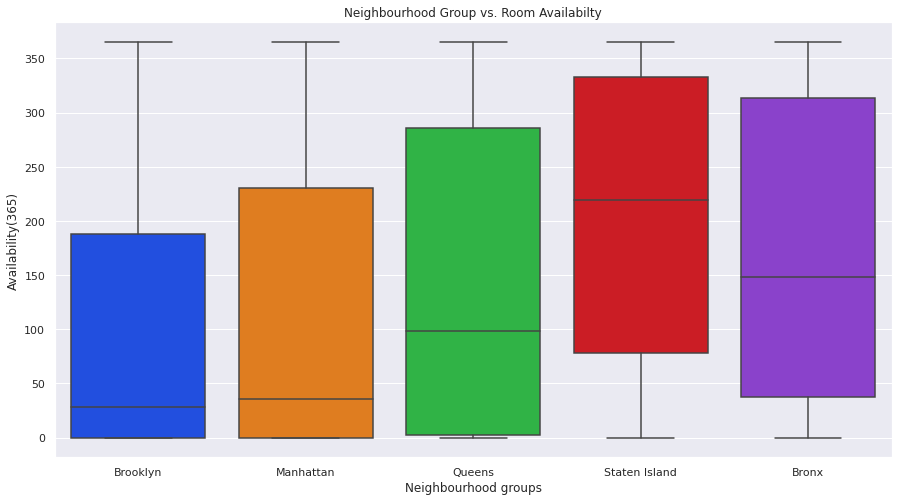

In [ ]:
f,ax = plt.subplots(figsize=(15,8))
ax=sns.boxplot(x='neighbourhood_group',y='availability_365',data=df_air,palette="bright")
plt.title("Neighbourhood Group vs. Room Availabilty")
plt.xlabel('Neighbourhood groups')
plt.ylabel('Availability(365)')
plt.show()

Looking at the above categorical box plot we can infer that the listings in **Staten Island** seems to be more available throughout the year to more than 300 days. On an average, these listings are available to around 210 days every year followed by **Bronx** where every listings are available for 150 on an average every year.

# Let's see what can be done with latitude and longitude!

Text(0.5, 1.0, 'Location Co-ordinates')

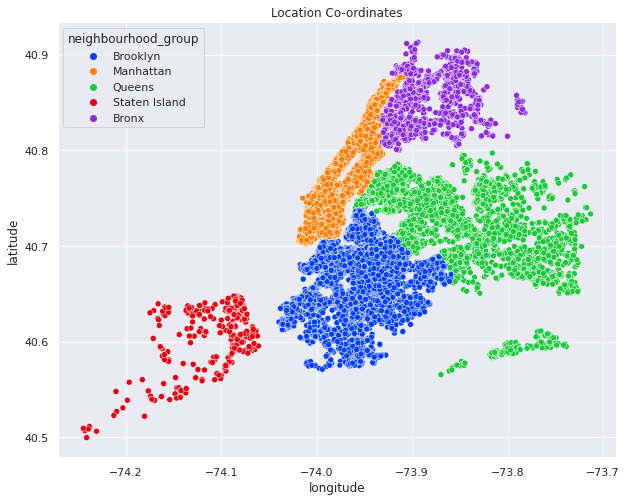

In [ ]:
#trying to find where the coordinates belong from the latitude and longitude
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(data=df_air_pnw, x="longitude", y="latitude",hue='neighbourhood_group',palette='bright')
ax.set_title('Location Co-ordinates')


**Let's observe the type of rooms as well**

Text(0.5, 1.0, 'Distribution of type of rooms across NYC')

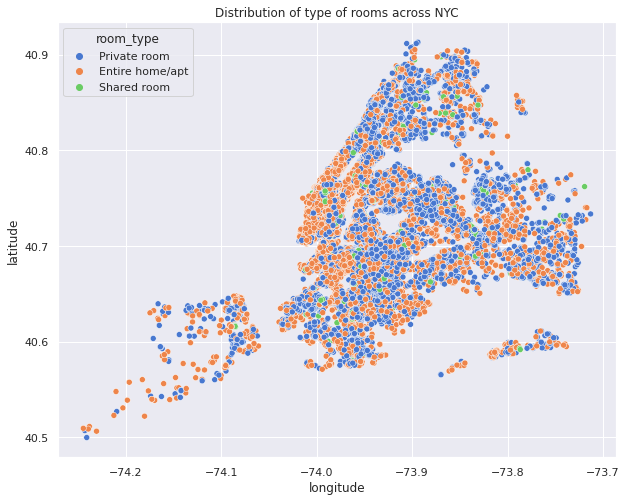

In [ ]:
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(x=df_air_pnw.longitude, y=df_air_pnw.latitude,hue=df_air.room_type,palette='muted')
ax.set_title('Distribution of type of rooms across NYC')

By the two scatterplots of latitude vs longitude we can infer there's is very less shared room throughout NYC as compared to private and Entire home/apt. <br>

95% of the listings on Airbnb are either **Private room** or **Entire/home apt**. Very few guests had opted for shared rooms on Airbnb. <br>

Also, guests mostly prefer this room types when they are looking for a rent on Airbnb as we found out previously in our analysis.

**Let's have an idea of the price variations across these co-ordinates in a more clear way**

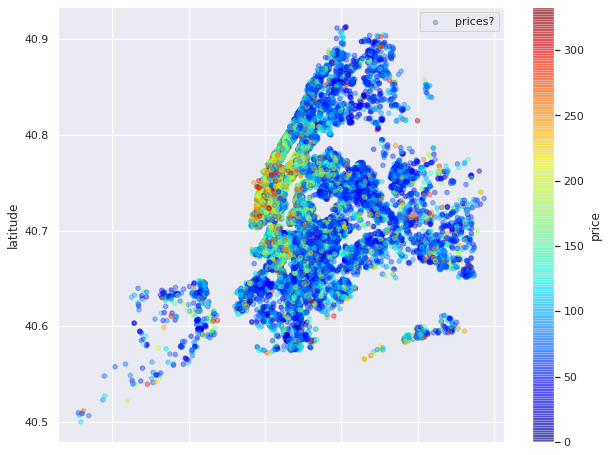

In [ ]:
lat_long=df_air_pnw1.plot(kind='scatter', x='longitude', y='latitude', label='prices?', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
lat_long.legend()

We can infer that there are high range of prices across **Manhattan** being the most costliest place to stay in NYC

*Was Curious to check the scatter plot on top of the NYC map with boroughs * <br>

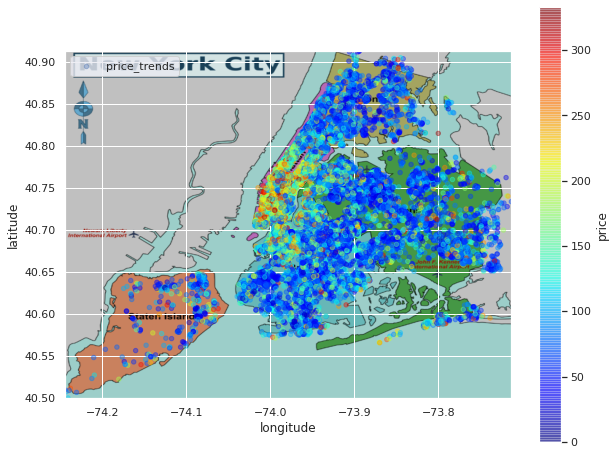

In [ ]:
#saved the original map image in my local directory and read the img using imread function

plt.figure(figsize=(10,7))
img=imread('/content/drive/MyDrive/Colab Notebooks/dat/613px-New_York_City_District_Map.png')

plt.imshow(img,zorder=0,extent=[df_air_pnw1['longitude'].min(),df_air_pnw1['longitude'].max(),df_air_pnw1['latitude'].min(),df_air_pnw1['latitude'].max()])
ax = plt.gca()
df_air_pnw1.plot(kind='scatter', x='longitude', y='latitude', label='price_trends', c='price',ax=ax,
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
plt.legend()
plt.show()

**Let's look at the listings availability in a year throughout NYC** 

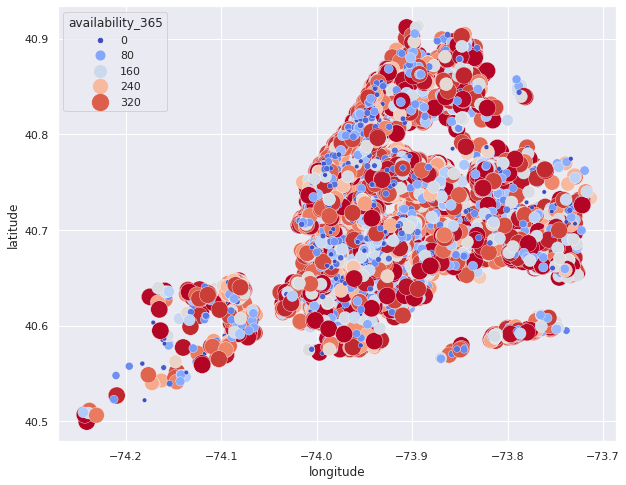

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
ax=sns.scatterplot(data=df_air_pnw1,x='longitude', y='latitude', hue="availability_365",palette='coolwarm',size='availability_365',
    sizes=(20,300))

Also, looks **Bronx** & **Staten Island** has listings which are mostly available throughout the year, might be the case as they are not much costlier as compared to other boroughs as in Manhanttan, Brooklyn & Queens.

I've reached almost the end of the analysis. There might be few analysis which can be done more. <br>

We philosophied about the variables, we analysed 'price' and also checked with the most correlated variables, we dealt with missing data and outliers, we tested some of the fundamental statistical assumptions and we even transformed categorial variables into dummy variables. That's a lot of work that Python helped us make easier.

In [ ]:
#This notebook is contributed by Sudip Roy